# Graph Neural Networks

In [2]:
import torch
from torch import nn
from torch.nn import functional as F
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

## Graph metrics

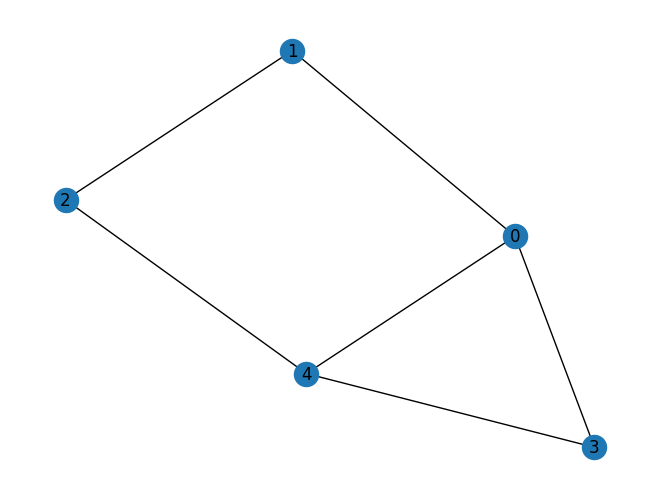

In [161]:
A = np.array([
    [0, 1, 0, 1, 1],
    [1, 0, 1, 0, 0],
    [0, 1, 0, 0, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 1, 1, 0],
])

rows, cols = np.where(A == 1)
edges = zip(rows.tolist(), cols.tolist())
g = nx.Graph()
g.add_edges_from(edges)

nx.draw(g, with_labels=True)

### Degree centrality

- $ c_d(v_i) = d(v_i) = \sum_{j=1}^N \mathbf{A}_{ij} $

In [251]:
A.sum(axis=1)

array([3, 2, 2, 2, 3])

### Eigenvector centrality

- For a given node $v_i$, take the weighted sum between adjacency indicator $\mathbf{A}_{ij}$ and centrality scores of $v_j$
\begin{align*} 
    c_e(v_i) &= \dfrac{1}{\lambda} \sum_{j = 1}^N \mathbf{A}_{ij} c_e(v_j)\\
    \mathbf{c_e} &= \dfrac{1}{\lambda} \mathbf{A} \mathbf{c_e}\\
    \lambda \mathbf{c_e} &= \mathbf{A} \mathbf{c_e}\\
\end{align*}
- Thus, $\lambda$ is the eigenvalue with corresponding eigenvector $\mathbf{c_e}$

In [186]:
nx.eigenvector_centrality_numpy(g)

{0: 0.5298990988806639,
 1: 0.3577512399397836,
 3: 0.42713228706574713,
 4: 0.5298990988806638,
 2: 0.35775123993978375}

In [252]:
eigvals, eigvecs = np.linalg.eigh(A)

idx = np.argmax(eigvals)
centrality_score = np.abs(eigvecs[:, idx]) # sign of eigenvector is arbitrary

print(f"centrality score: {centrality_score}")
print(f"node with highest centrality score: argmax scores = {centrality_score.argmax()}")
centrality_score

centrality score: [0.5298991  0.35775124 0.35775124 0.42713229 0.5298991 ]
node with highest centrality score: argmax scores = 0


array([0.5298991 , 0.35775124, 0.35775124, 0.42713229, 0.5298991 ])

## Laplacian matrix

In [258]:
D = np.diag(A.sum(axis=1))
L = D - A

L

array([[ 3, -1,  0, -1, -1],
       [-1,  2, -1,  0,  0],
       [ 0, -1,  2,  0, -1],
       [-1,  0,  0,  2, -1],
       [-1,  0, -1, -1,  3]])

In [260]:
D_inv = np.linalg.pinv(D)
L_norm = D_inv**0.5 @ (D - A) @ D_inv**0.5 
L_norm

array([[ 1.        , -0.40824829,  0.        , -0.40824829, -0.33333333],
       [-0.40824829,  1.        , -0.5       ,  0.        ,  0.        ],
       [ 0.        , -0.5       ,  1.        ,  0.        , -0.40824829],
       [-0.40824829,  0.        ,  0.        ,  1.        , -0.40824829],
       [-0.33333333,  0.        , -0.40824829, -0.40824829,  1.        ]])